In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem
import scipy.stats as st


In [2]:
# File to Load (Remember to Change These)
file_to_load = "Resources/NCOV_COVID_Cases_by_Age_Group_20210920.csv"

# Read Purchasing File and store into Pandas data frame
covid_agegroup_df = pd.read_csv(file_to_load)


In [3]:
#covid_agegroup_df["agegroup"].replace("10-19_", "10-19", regex=True)


## Victoria COVID - 19 Cases by Age Group

Diagnosis period (25/1/20 - 19/9/21)

In [4]:
#Date format
covid_agegroup_df["diagnosis_date"]= pd.to_datetime(covid_agegroup_df["diagnosis_date"],dayfirst=True)

In [5]:
#covid_agegroup_df.sort_values("diagnosis_date", ascending=True)


In [6]:
totaL_covid_cases = covid_agegroup_df["diagnosis_date"].count()
totaL_covid_cases

29596

In [7]:
age_bracket = covid_agegroup_df.groupby(["agegroup"]).count()
age_bracket

,diagnosis_date
agegroup,
0-9,2580
10-19_,3583
20-29,6954
30-39,5258
40-49,3603
50-59,2986
60-69,1669
70-79,1058
80-89,1150


In [8]:
age_range = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90+"]
infection_no = [2511, 3493, 6809, 5151, 3542, 2933, 1640, 1038, 1138, 753]
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue", "yellow", "pink", "purple", "red", "white", "orange"]



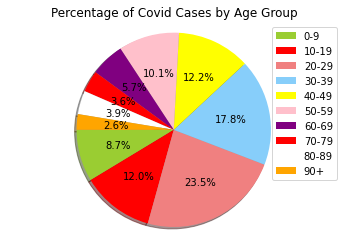

In [9]:
plt.title("Percentage of Covid Cases by Age Group")
plt.pie(infection_no, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.legend (age_range, loc="upper right")
plt.show()

## Population of Victoria vs COVID cases

Population of Victoria March 21 2021- 6,648,564 
Total covid cases - 29008

In [10]:
total = ["infected","non-infection"] 
population = [29008, 6619556]
colors = ["red", "green"]

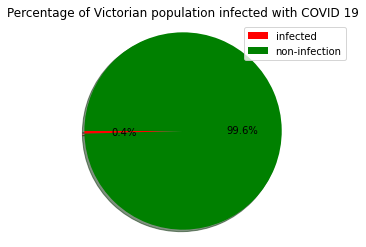

In [11]:
plt.title("Percentage of Victorian population infected with COVID 19")
plt.pie(population, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.legend (total, loc="upper right")
plt.show()

In [12]:
under_ten_df = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "0-9"]
under_ten_df

,diagnosis_date,agegroup
483,2020-04-02,0-9
509,2020-04-02,0-9
622,2020-05-12,0-9
641,2020-04-04,0-9
754,2020-06-13,0-9
...,...,...
29543,2021-09-20,0-9
29553,2021-09-20,0-9
29556,2021-09-20,0-9
29566,2021-09-20,0-9


In [13]:
#under_ten_df["count"]=under_ten_df.groupby(["diagnosis_date"]).transform("count")["agegroup"]
#under_ten_df

In [14]:
underten = under_ten_df.groupby(["diagnosis_date"]).count()
underten

,agegroup
diagnosis_date,
2020-03-23,1
2020-03-30,5
2020-04-01,2
2020-04-02,2
2020-04-04,2
...,...
2021-09-16,82
2021-09-17,68
2021-09-18,76


In [15]:
underten.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2020-03-23 to 2021-09-20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   agegroup  239 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


In [16]:
# p=underten.index.values
# underten_df=underten.insert(0,column='diagnosis_date',value=p)
# n_underten_df=underten_df

In [17]:
#underten_df=underten
p=underten.index.values
underten.insert(0,column='diagnosis_date',value=p)

In [18]:
underten.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2020-03-23 to 2021-09-20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   diagnosis_date  239 non-null    datetime64[ns]
 1   agegroup        239 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.6 KB


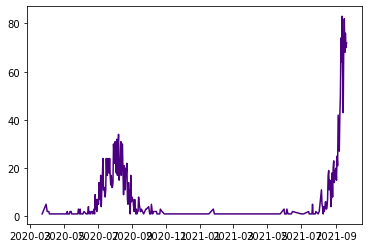

In [19]:
#
plt.plot(underten.iloc[:,0],underten.iloc[:,1],color="indigo", label="Under TEN years old")
plt.show()

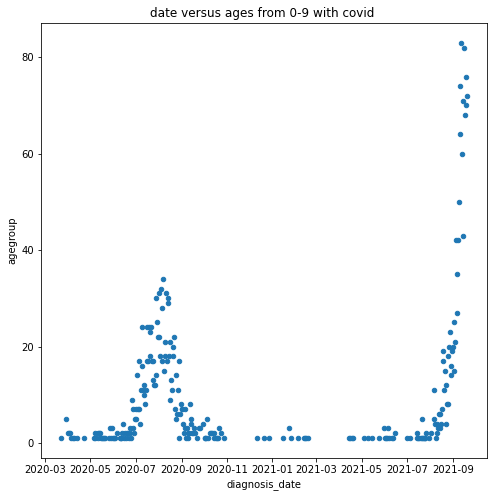

In [20]:
# # Create a scatter date versus ages from 0-9 with covid  
underten.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages from 0-9 with covid ")
plt.show()

In [21]:
under_twenty = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "10-19_"]
under_twenty

,diagnosis_date,agegroup
25,2020-03-19,10-19_
26,2020-03-19,10-19_
52,2020-03-17,10-19_
87,2020-03-22,10-19_
122,2020-03-22,10-19_
...,...,...
29532,2021-09-20,10-19_
29540,2021-09-20,10-19_
29555,2021-09-20,10-19_
29570,2021-09-20,10-19_


In [22]:
undertwenty = under_twenty.groupby(["diagnosis_date"]).count()
undertwenty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-03-14 to 2021-09-20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   agegroup  254 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [23]:
p=undertwenty.index.values
undertwenty.insert(0,column='diagnosis_date',value=p)

In [24]:
undertwenty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2020-03-14 to 2021-09-20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   diagnosis_date  254 non-null    datetime64[ns]
 1   agegroup        254 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.0 KB


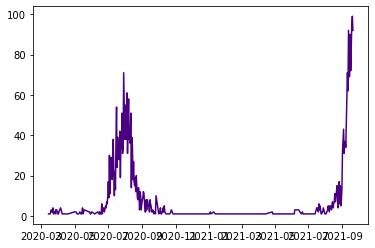

In [25]:
#Plot line graph date versus ages from 10-19 with covid 
plt.plot(undertwenty.iloc[:,0],undertwenty.iloc[:,1],color="indigo", label="Under TWENTY years old")
plt.show()

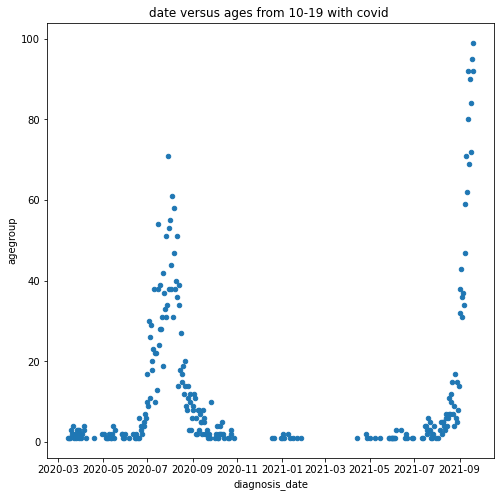

In [26]:
# Create a scatter date versus ages from 10-19 with covid  
undertwenty.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages from 10-19 with covid ")
plt.show()

In [27]:
twenties = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "20-29"]
twenties

,diagnosis_date,agegroup
0,2020-03-11,20-29
7,2020-01-31,20-29
27,2020-03-21,20-29
33,2020-03-13,20-29
35,2020-03-12,20-29
...,...,...
29588,2021-09-20,20-29
29589,2021-09-20,20-29
29591,2021-09-20,20-29
29593,2021-09-20,20-29


In [28]:
twentygrp =twenties.groupby(["diagnosis_date"]).count()
twentygrp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2020-01-31 to 2021-09-20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   agegroup  330 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [29]:
p=twentygrp.index.values
twentygrp.insert(0,column='diagnosis_date',value=p)

In [30]:
twentygrp

,diagnosis_date,agegroup
diagnosis_date,,
2020-01-31,2020-01-31,1
2020-02-22,2020-02-22,1
2020-03-09,2020-03-09,1
2020-03-11,2020-03-11,1
2020-03-12,2020-03-12,2
...,...,...
2021-09-16,2021-09-16,117
2021-09-17,2021-09-17,116
2021-09-18,2021-09-18,124


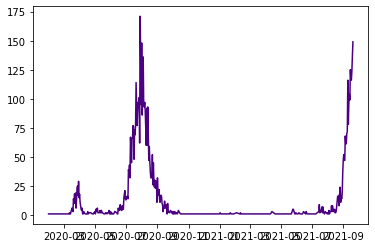

In [31]:
#Plot line graph date versus ages from 20-29 with covid 
plt.plot(twentygrp.iloc[:,0],twentygrp.iloc[:,1],color="indigo", label="20-29 years old")
plt.show()

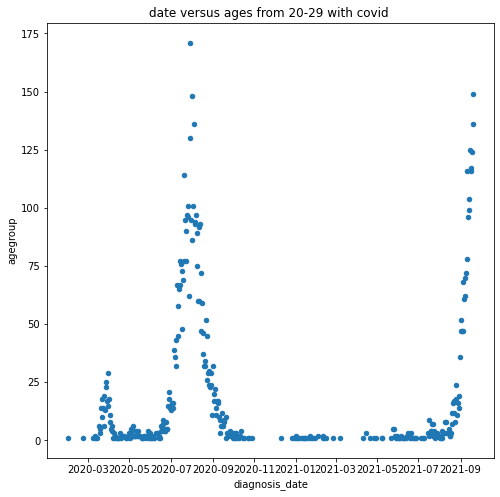

In [32]:
# Create a scatter date versus ages from 20-29 with covid  
twentygrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages from 20-29 with covid ")
plt.show()

In [33]:
thirties = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "30-39"]
thirties

,diagnosis_date,agegroup
3,2020-08-01,30-39
4,2020-03-01,30-39
10,2020-03-13,30-39
15,2020-03-04,30-39
17,2020-03-14,30-39
...,...,...
29576,2021-09-20,30-39
29578,2021-09-20,30-39
29580,2021-09-20,30-39
29586,2021-09-20,30-39


In [34]:
thirtiesgrp =thirties.groupby(["diagnosis_date"]).count()
thirtiesgrp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 317 entries, 2020-03-01 to 2021-09-20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   agegroup  317 non-null    int64
dtypes: int64(1)
memory usage: 5.0 KB


In [35]:
# thirtiesgrp_df=thirtiesgrp.cumsum()
# thirtiesgrp_df

In [36]:
p=thirtiesgrp.index.values
thirtiesgrp.insert(0,column='diagnosis_date',value=p)

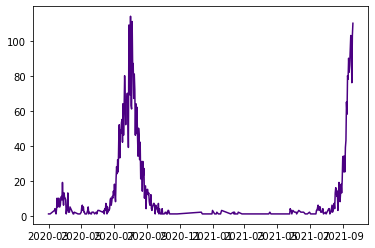

In [37]:
#Plot line graph date versus ages from 30-39 with covid 
plt.plot(thirtiesgrp.iloc[:,0],thirtiesgrp.iloc[:,1],color="indigo", label="30-39 years old")
plt.show()

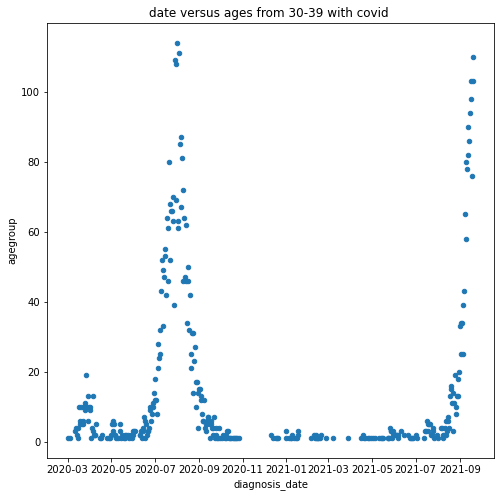

In [38]:
# Create a scatter date versus ages from 30-39 with covid  
thirtiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages from 30-39 with covid ")
plt.show()

In [39]:
forties = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "40-49"]
forties

,diagnosis_date,agegroup
6,2020-01-30,40-49
9,2020-03-15,40-49
12,2020-03-13,40-49
13,2020-03-11,40-49
16,2020-03-13,40-49
...,...,...
29558,2021-09-20,40-49
29562,2021-09-20,40-49
29567,2021-09-20,40-49
29583,2021-09-20,40-49


In [40]:
fortiesgrp =forties.groupby(["diagnosis_date"]).count()
fortiesgrp

,agegroup
diagnosis_date,
2020-01-30,1
2020-03-11,2
2020-03-12,1
2020-03-13,2
2020-03-15,5
...,...
2021-09-16,55
2021-09-17,67
2021-09-18,52


In [41]:
p=fortiesgrp.index.values
fortiesgrp.insert(0,column='diagnosis_date',value=p)

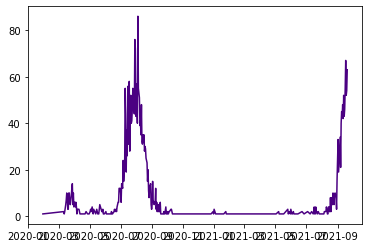

In [42]:
#Plot line graph date versus ages from 40-49 with covid 
plt.plot(fortiesgrp.iloc[:,0],fortiesgrp.iloc[:,1],color="indigo", label="40-49 years old")
plt.show()

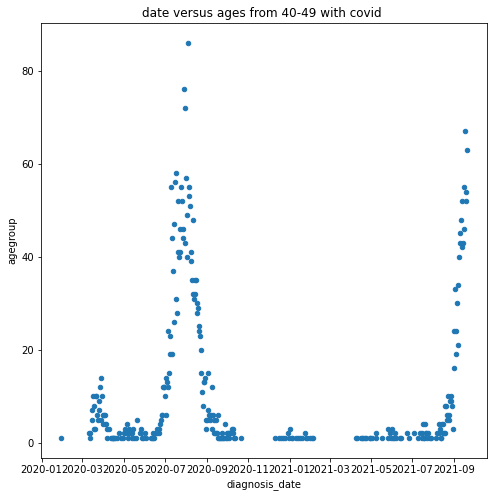

In [43]:
# Create a scatter date versus ages from 40-49 with covid  
fortiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages from 40-49 with covid ")
plt.show()

In [44]:
# fortiesgrp.sort_values("diagnosis_date", ascending=True)
# fortiesgrp_df=fortiesgrp.cumsum()
# fortiesgrp_df

In [45]:
fifty = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "50-59"]
fifty.head()

,diagnosis_date,agegroup
8,2020-03-11,50-59
14,2020-03-13,50-59
36,2020-03-12,50-59
37,2020-04-06,50-59
40,2020-03-10,50-59


In [46]:
fiftygrp =fifty.groupby(["diagnosis_date"]).count()
fiftygrp

,agegroup
diagnosis_date,
2020-01-25,1
2020-03-07,1
2020-03-08,1
2020-03-09,1
2020-03-10,2
...,...
2021-09-16,54
2021-09-17,52
2021-09-18,51


In [47]:
p=fiftygrp.index.values
fiftygrp.insert(0,column='diagnosis_date',value=p)

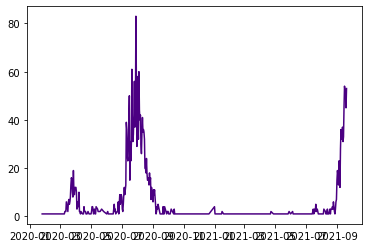

In [48]:
#Plot line graph date versus ages from 50-59 with covid 
plt.plot(fiftygrp.iloc[:,0],fiftygrp.iloc[:,1],color="indigo", label="50-59 years old")
plt.show()

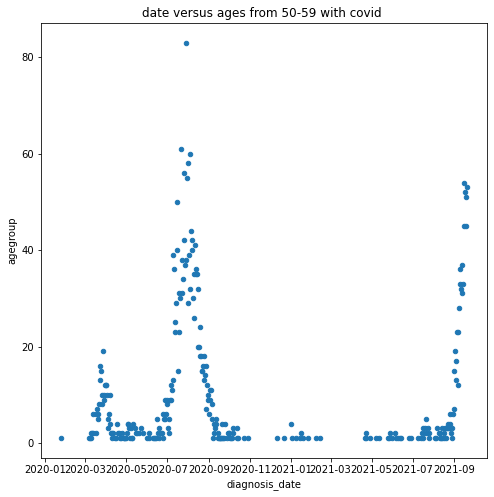

In [49]:
# Create a scatter date versus ages from 50-59 with covid  
fiftygrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages from 50-59 with covid ")
plt.show()

In [50]:
sixties = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "60-69"]
sixties 

,diagnosis_date,agegroup
1,2020-03-08,60-69
5,2020-01-28,60-69
11,2020-03-13,60-69
18,2020-03-13,60-69
23,2020-03-19,60-69
...,...,...
29547,2021-09-20,60-69
29548,2021-09-20,60-69
29564,2021-09-20,60-69
29581,2021-09-20,60-69


In [51]:
sixtiesgrp =sixties.groupby(["diagnosis_date"]).count()
sixtiesgrp

,agegroup
diagnosis_date,
2020-01-28,1
2020-02-22,1
2020-02-25,1
2020-03-08,1
2020-03-12,2
...,...
2021-09-16,16
2021-09-17,21
2021-09-18,12


In [52]:
p=sixtiesgrp.index.values
sixtiesgrp.insert(0,column='diagnosis_date',value=p)

In [53]:
sixtiesgrp

,diagnosis_date,agegroup
diagnosis_date,,
2020-01-28,2020-01-28,1
2020-02-22,2020-02-22,1
2020-02-25,2020-02-25,1
2020-03-08,2020-03-08,1
2020-03-12,2020-03-12,2
...,...,...
2021-09-16,2021-09-16,16
2021-09-17,2021-09-17,21
2021-09-18,2021-09-18,12


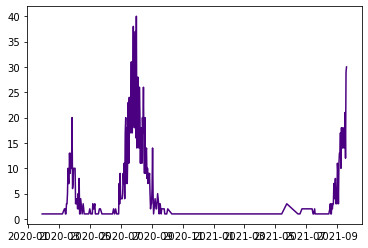

In [54]:
#Plot line graph date versus ages from 60-69 with covid 
plt.plot(sixtiesgrp.iloc[:,0],sixtiesgrp.iloc[:,1],color="indigo", label="60-69 years old")
plt.show()

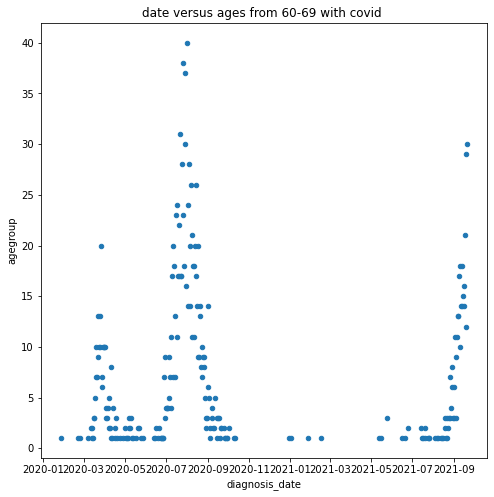

In [55]:
# Create a scatter date versus ages from 50-59 with covid  
sixtiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages from 60-69 with covid ")
plt.show()

In [56]:
seventies = covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "70-79"]
seventies 

,diagnosis_date,agegroup
2,2020-03-09,70-79
21,2020-03-06,70-79
79,2020-03-21,70-79
131,2020-03-22,70-79
145,2020-03-25,70-79
...,...,...
29508,2021-09-20,70-79
29533,2021-09-20,70-79
29550,2021-09-20,70-79
29574,2021-09-20,70-79


In [83]:
seventiesgrp = seventies.groupby(["diagnosis_date"]).count()
seventiesgrp

,agegroup
diagnosis_date,
2020-03-01,1
2020-03-06,1
2020-03-09,1
2020-03-17,1
2020-03-19,3
...,...
2021-09-16,9
2021-09-17,7
2021-09-18,9


In [84]:
p=seventiesgrp.index.values
seventiesgrp.insert(0,column='diagnosis_date',value=p)

In [82]:
#seventiesgrp.reset_index(drop = True)

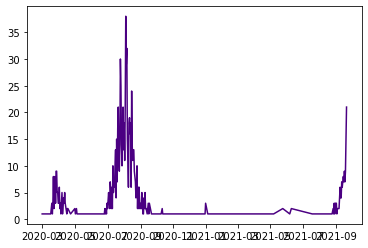

In [60]:
#Plot line graph date versus ages from 70-79 with covid 
plt.plot(seventiesgrp.iloc[:,0],seventiesgrp.iloc[:,1],color="indigo", label="70-79 years old")
plt.show()

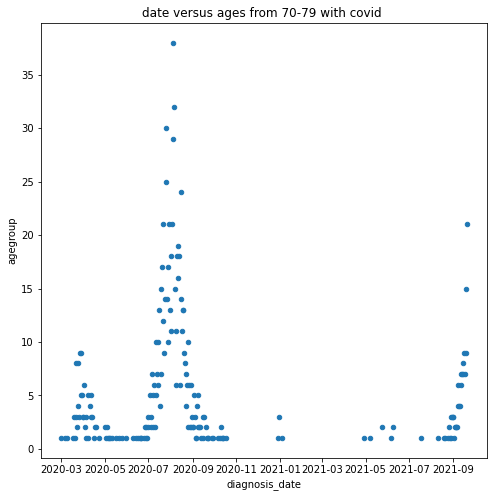

In [61]:
# Create a scatter date versus ages from 70-79 with covid  
seventiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages from 70-79 with covid ")
plt.show()

In [85]:
eighties= covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "80-89"]
#eighties

In [63]:
eightiesgrp = eighties.groupby(["diagnosis_date"]).count()
eightiesgrp

,agegroup
diagnosis_date,
2020-03-21,1
2020-03-22,2
2020-03-23,1
2020-03-24,1
2020-03-25,1
...,...
2021-09-16,3
2021-09-17,5
2021-09-18,3


In [64]:
p=eightiesgrp.index.values
eightiesgrp.insert(0,column='diagnosis_date',value=p)

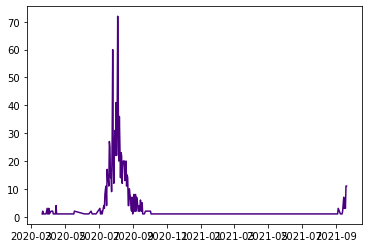

In [65]:
#Plot line graph date versus ages from 80-89 with covid 
plt.plot(eightiesgrp.iloc[:,0],eightiesgrp.iloc[:,1],color="indigo", label="80-89 years old")
plt.show()

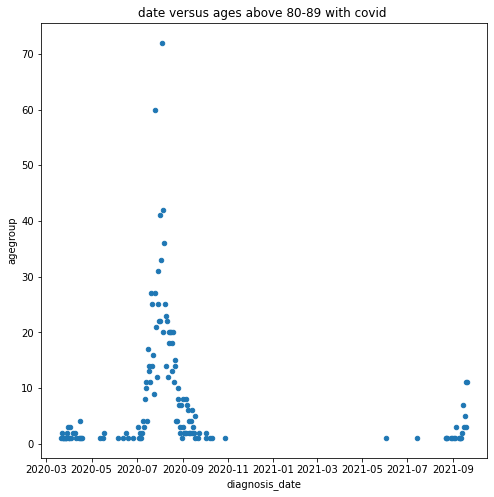

In [66]:
# Create a scatter date versus ages from 80-89 with covid  
eightiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages above 80-89 with covid ")
plt.show()

In [67]:
nineties= covid_agegroup_df.loc[covid_agegroup_df["agegroup"] == "90+"]
nineties 

,diagnosis_date,agegroup
926,2020-07-27,90+
974,2020-08-13,90+
1006,2020-06-07,90+
1078,2020-08-01,90+
1094,2020-08-03,90+
...,...,...
28562,2021-09-18,90+
28596,2021-09-18,90+
28988,2021-09-20,90+
29111,2021-09-19,90+


In [68]:
ninetiesgrp = nineties.groupby(["diagnosis_date"]).count()
ninetiesgrp

,agegroup
diagnosis_date,
2020-03-31,1
2020-04-07,1
2020-04-18,1
2020-04-27,1
2020-04-29,2
...,...
2021-09-14,1
2021-09-15,1
2021-09-18,2


In [69]:
p=ninetiesgrp.index.values
ninetiesgrp.insert(0,column='diagnosis_date',value=p)

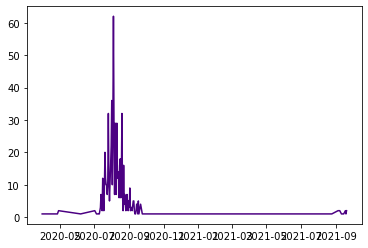

In [70]:
#Plot line graph date versus ages from 90-99 with covid 
plt.plot(ninetiesgrp.iloc[:,0],ninetiesgrp.iloc[:,1],color="indigo", label="90-99 years old")
plt.show()

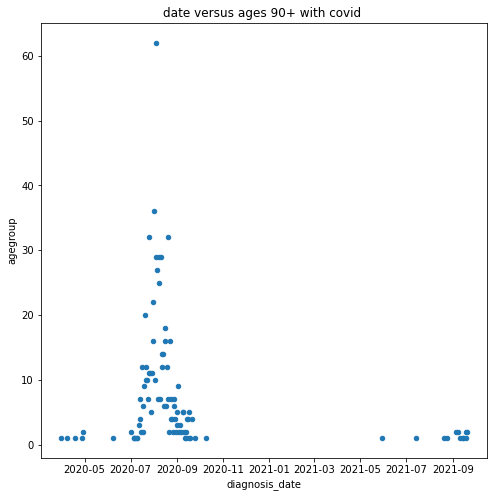

In [71]:
# Create a scatter date versus ages from 90-99 with covid  
ninetiesgrp.plot(kind="scatter", x="diagnosis_date", y="agegroup", grid=False, figsize=(8,8),
              title="date versus ages 90+ with covid ")
plt.show()

In [72]:
len(nineties.index)

755